In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This Notebook is a start point of our [Arsl Word Notebook](https://www.kaggle.com/code/manarsabrii/arsl-translator-conv1d-acc-93)

<h1 style="color:#dc0405;font-size:60px;font-family:Georgia;text-align:center;"><strong>Arabic <strong style="color:black;font-size:50px;font-family:Georgia;">Sign <strong style="color:#dc0405;font-size:80px;font-family:Georgia;">Language <strong style="color:black;font-size:65px;font-family:Georgia;"> (ARSL)<strong style="color:black;font-size:80px;font-family:Georgia;"> Translator <strong style="color:#dc0405;font-size:50px;font-family:Georgia;">Character Based<strong style="color:#dc0405;font-size:60px;font-family:Georgia;"></strong></strong></strong></strong></strong></strong></strong></h1>



![](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMnN1cTRwamR4bXFvNmdlMWdmcmp2MW44b3p4a2cwMDVmb29qYzhzaiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/7JENFrLqhBNlew5Byt/giphy.gif)


<h1 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;"><strong>📋✔️ Table <strong style="color:black;font-size:30px;font-family:Georgia;">Of <strong style="color:#dc0405;font-size:40px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">Contents <strong style="color:#dc0405;font-size:40px;font-family:Georgia;">
</strong></strong></strong></strong></strong></h1>

* [1.Objectives of ARSL Translator](#1)
* [2.Introducation](#2)
* [3.Importing The Libraries](#3)
* [4.Getting Data & Resizing it](#4)
* [5.Split & Labeling the Data](#5)
* [6.Contrast and Enhancement Layer ](#6)
* [7.Augmentation Layer](#7)
* [8.Model1 (VGG16)](#8)
* [9.Results & Conclusion](#9)
* [10.Model 2(CNN Designed Architecture)](#10)
* [11.Results &Conclusion](#11)


<a id="2"></a>
<h2 style="color:#dc0405;font-size:45px;font-family:Georgia;text-align:center;"><strong>📑🎤 2. <strong style="color:black;font-size:40px;font-family:Georgia;">Introduction </strong></strong></h2>


<p style= "background-color:#f6f6f6;font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#000000;"><br>
    <b>An Arabic sign language to text translator Characters based is a deep learning project that uses VGG Model and CNN designed architecture to translate Arabic sign Character into text.<br>
<br>
To train an Arabic sign language to text translator, a large dataset of Arabic sign language characters is used  and corresponding text transcripts is needed. The model is then trained on this dataset to learn the relationship between the sign language characters images and the corresponding text transcripts. Once the model is trained, it can be used to translate any Arabic Character into text then, integrating this part with ArSL translator words based we alsp worked on to fill in the gap between Hearing Impaired people and normal people.<br>


<a id="2"></a>
<h2 style="color:#dc0405;font-size:45px;font-family:Georgia;text-align:center;"><strong>📑🎤 2. <strong style="color:black;font-size:40px;font-family:Georgia;">Introduction </strong></strong></h2>


<p style= "background-color:#f6f6f6;font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#000000;"><br>
    <b>An Arabic sign language to text translator Characters based is a deep learning project that uses VGG Model and CNN designed architecture to translate Arabic sign Character into text.<br>
<br>
To train an Arabic sign language to text translator, a large dataset of Arabic sign language characters is used  and corresponding text transcripts is needed. The model is then trained on this dataset to learn the relationship between the sign language characters images and the corresponding text transcripts. Once the model is trained, it can be used to translate any Arabic Character into text then, integrating this part with ArSL translator words based we alsp worked on to fill in the gap between Hearing Impaired people and normal people.<br>


<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 3. Import <strong style="color:black;font-size:35px;font-family:Georgia;">Libraries</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="3"></a>


In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import models
from keras import layers
from tensorflow.python.client import device_lib

<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 4. Getting Data <strong style="color:black;font-size:35px;font-family:Georgia;">and Resizing it</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="4"></a>

In [ ]:
from PIL import Image
import os

# Set your main directory containing subfolders
main_directory = "/content/gdrive/MyDrive/kaggle_01/Aya"
destination_directory = "/content/gdrive/MyDrive/kaggle_01/aya_03"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Define the target size (50x50 in this case)
target_size = (50, 50)

# Iterate through subfolders in the main directory
for subfolder in os.listdir(main_directory):
    subfolder_path = os.path.join(main_directory, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Create a subfolder in the destination directory
        subfolder_destination = os.path.join(destination_directory, subfolder)
        os.makedirs(subfolder_destination, exist_ok=True)

        # Loop through the images in the subfolder and resize them
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".jpg"):  # Adjust the file extension as needed
                image = Image.open(os.path.join(subfolder_path, filename))
                image = image.resize(target_size, Image.ANTIALIAS)  # Resize with anti-aliasing
                image.save(os.path.join(subfolder_destination, filename))

<ipython-input-18-17d011c47430>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.

  image = image.resize(target_size, Image.ANTIALIAS)  # Resize with anti-aliasing


In [ ]:
from PIL import Image
import os

# Set your main directory containing subfolders
main_directory = "/content/gdrive/MyDrive/kaggle_01/Peter/Characters_Dataset"
destination_directory = "/content/gdrive/MyDrive/kaggle_01/Peter/peter_03"

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Define the target size (50x50 in this case)
target_size = (50, 50)

# Iterate through subfolders in the main directory
for subfolder in os.listdir(main_directory):
    subfolder_path = os.path.join(main_directory, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Create a subfolder in the destination directory
        subfolder_destination = os.path.join(destination_directory, subfolder)
        os.makedirs(subfolder_destination, exist_ok=True)

        # Loop through the images in the subfolder and resize them
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".jpg"):  # Adjust the file extension as needed
                image = Image.open(os.path.join(subfolder_path, filename))
                image = image.resize(target_size, Image.ANTIALIAS)  # Resize with anti-aliasing
                image.save(os.path.join(subfolder_destination, filename))

<ipython-input-19-115b6ab00584>:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.

  image = image.resize(target_size, Image.ANTIALIAS)  # Resize with anti-aliasing


<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 5. Split <strong style="color:black;font-size:35px;font-family:Georgia;">and Labeling</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="5"></a>


In [3]:
dataset_path1 = r"/content/gdrive/MyDrive/kaggle_01/Peter/peter_03"
dataset_path2 = r"/content/gdrive/MyDrive/kaggle_01/aya_03"

In [4]:
classes = [ 'aleff',  'bb', 'ta', 'thaa', 'jeem', 'haa', 'khaa', 'dal', 'thal', 'ra', \
         'zay' , 'seen', 'sheen',  'saad', 'dhad','taa', 'dha', 'ain', 'ghain','fa', \
          'gaaf', 'kaaf','laam', 'meem', 'nun', 'ha', 'waw','ya']

In [5]:
dataset1 = image_dataset_from_directory(dataset_path1,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(50,50),color_mode='rgb',label_mode= 'categorical',
                                             class_names=classes)

Found 2800 files belonging to 28 classes.


In [6]:
dataset2 = image_dataset_from_directory(dataset_path2,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(50,50),color_mode='rgb',label_mode= 'categorical',
                                             class_names=classes)

Found 2800 files belonging to 28 classes.


In [7]:
# Combine 2 Datasets
dataset = dataset1.concatenate(dataset2)
# Get No. of Batches
tf.data.experimental.cardinality(dataset)

<tf.Tensor: shape=(), dtype=int64, numpy=176>

In [8]:
# Split to Training and Validation
dataset_batches = tf.data.experimental.cardinality(dataset)
# 30% of Data To Validation and Testing
validation_dataset = dataset.take(dataset_batches // 7)
# 70% of Data To Training
training_dataset = dataset.skip(dataset_batches // 7)

In [9]:
# Split the Validation to valid and test
val_batches = tf.data.experimental.cardinality(validation_dataset)
testing_dataset = validation_dataset.take(val_batches // 2)
validation_dataset = validation_dataset.skip(val_batches // 2)

In [10]:
# To Increase up Feeding Data To Network
AUTOTUNE = tf.data.AUTOTUNE
training_dataset = training_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
testing_dataset = testing_dataset.prefetch(buffer_size=AUTOTUNE)

In [11]:
# Display The No. of Batches
print(tf.data.experimental.cardinality(training_dataset))
print(tf.data.experimental.cardinality(validation_dataset))
print(tf.data.experimental.cardinality(testing_dataset))

tf.Tensor(151, shape=(), dtype=int64)

tf.Tensor(13, shape=(), dtype=int64)

tf.Tensor(12, shape=(), dtype=int64)


<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 6. Contrast  <strong style="color:black;font-size:35px;font-family:Georgia;">and Brightness layer</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="6"></a>

In [12]:
# Custom Layer for Brightness and Contrast
class RandomColorDistortion(tf.keras.layers.Layer):
    def __init__(self, contrast_range=[0.6, 1.8],
                 brightness_delta=[-0.3, 0.3], **kwargs):
        super(RandomColorDistortion, self).__init__(**kwargs)
        self.contrast_range = contrast_range
        self.brightness_delta = brightness_delta

    def call(self, images, training=True):
        if not training:
            return images

        contrast = np.random.uniform(
            self.contrast_range[0], self.contrast_range[1])
        brightness = np.random.uniform(
            self.brightness_delta[0], self.brightness_delta[1])

        images = tf.image.adjust_contrast(images, contrast)
        images = tf.image.adjust_brightness(images, brightness)
        images = tf.clip_by_value(images, 0, 255)
        return images

<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 7. Augmentation  <strong style="color:black;font-size:35px;font-family:Georgia;"> layer</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="7"></a>

In [13]:
# Augmentation Layer
data_augmentation = tf.keras.Sequential([
    # Make a Random Rotation
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.05),
    # Make a Random Width
    tf.keras.layers.RandomWidth((-.2,.2), interpolation='bilinear'),
    # Make a Random Height
    tf.keras.layers.RandomHeight((-.2,.2), interpolation='bilinear'),
    # Make a Random Translation
    tf.keras.layers.RandomTranslation((-0.1, 0.1),(-0.1, 0.1),fill_mode='constant'),
    # Resize image to 224 x 224 pixels again after Widthing,Heighting
    tf.keras.layers.Resizing(224,224,interpolation='bilinear'),
    # Make a Random Color
    RandomColorDistortion()
])

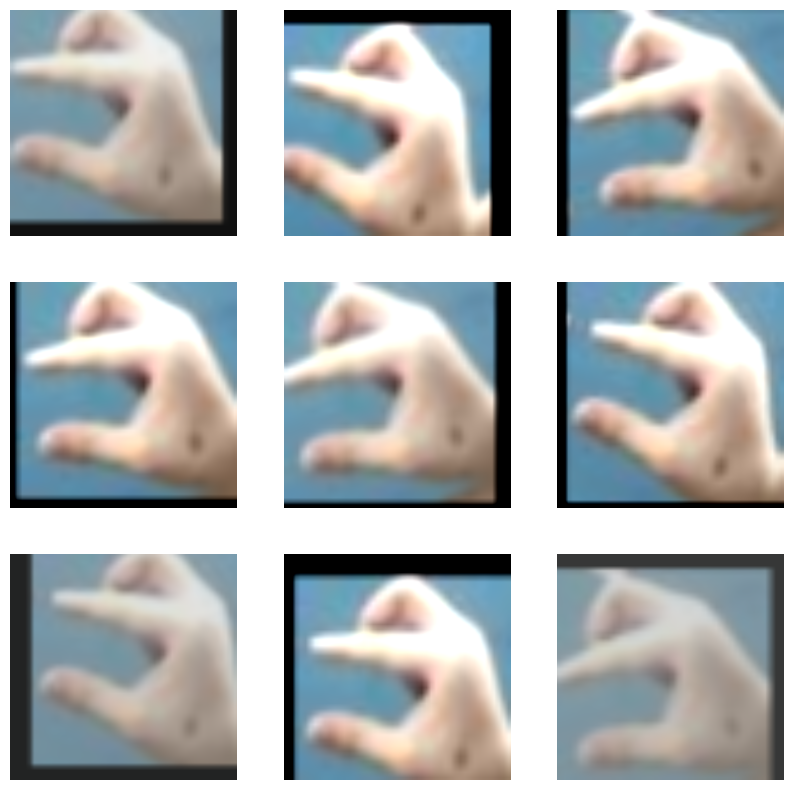

In [14]:
# Show The Output of Augmentation Layer for Same Image
for image, _ in training_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))

    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [15]:
BATCH_SIZE = 32
IMG_SIZE = (50,50)

<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 8. Model1  <strong style="color:black;font-size:35px;font-family:Georgia;"> VGG</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="8"></a>

* Using Pretrained Model as start to estimate the needed time, parameters and epcohs for training 

In [16]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [17]:
# Get The Base Network
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(50, 50, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [18]:
# Freeze Conv Layer
conv_base.trainable = False

In [19]:
# Build a Network for Training
inp = layers.Input(shape=(50,50,3))
x = data_augmentation(inp)
x = (conv_base)(inp)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outs = layers.Dense(len(classes), activation='softmax')(x)
model = models.Model(inputs=inp, outputs=[outs])

In [20]:
model.summary()

Model: "model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         

                                                                 

 vgg16 (Functional)          (None, 1, 1, 512)         14714688  

                                                                 

 flatten (Flatten)           (None, 512)               0         

                                                                 

 dense (Dense)               (None, 128)               65664     

                                                                 

 dense_1 (Dense)             (None, 28)                3612      

                                                                 


Total params: 14783964 (56.40 MB)

Trainable params: 69276 (270.61 KB)

Non-trainable params: 14714688 (56.13 MB)

_______________________________________________________________

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [22]:
log_dir = os.path.join('Logs/vgg16_transfer_learning')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/vgg16_transfer_learning.h5', monitor='val_acc', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1,patience=5)
callbacks = [tb_callback,mc,es]



In [23]:
model.fit(training_dataset,epochs=20,callbacks=[callbacks], validation_data = validation_dataset)


Epoch 1/20

151/151 [==============================] - ETA: 0s - loss: 2.0598 - acc: 0.8075

Epoch 1: val_acc improved from -inf to 0.85817, saving model to Models/vgg16_transfer_learning.h5

151/151 [==============================] - 533s 4s/step - loss: 2.0598 - acc: 0.8075 - val_loss: 0.7065 - val_acc: 0.8582


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


Epoch 2/20

151/151 [==============================] - ETA: 0s - loss: 0.0342 - acc: 0.9921

Epoch 2: val_acc improved from 0.85817 to 0.99038, saving model to Models/vgg16_transfer_learning.h5

151/151 [==============================] - 160s 1s/step - loss: 0.0342 - acc: 0.9921 - val_loss: 0.0181 - val_acc: 0.9904

Epoch 3/20

151/151 [==============================] - ETA: 0s - loss: 0.0042 - acc: 0.9990

Epoch 3: val_acc improved from 0.99038 to 0.99760, saving model to Models/vgg16_transfer_learning.h5

151/151 [==============================] - 190s 1s/step - loss: 0.0042 - acc: 0.9990 - val_loss: 0.0042 - val_acc: 0.9976

Epoch 4/20

151/151 [==============================] - ETA: 0s - loss: 8.9250e-04 - acc: 1.0000

Epoch 4: val_acc improved from 0.99760 to 1.00000, saving model to Models/vgg16_transfer_learning.h5

151/151 [==============================] - 175s 1s/step - loss: 8.9250e-04 - acc: 1.0000 - val_loss: 5.6613e-04 - val_acc: 1.0000

Epoch 5/20

151/151 [=============

In [24]:
import joblib
model.save('Models/last_training_model.h5')  # Save the Keras model as usual
# Now save the Keras model as .sav using joblib
joblib.dump(model, 'Models/last_training_model.sav')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


['Models/last_training_model.sav']

<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 9. Results  <strong style="color:black;font-size:35px;font-family:Georgia;"> and Conclusion</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="9"></a>

In [25]:
model.evaluate(testing_dataset)

12/12 [==============================] - 10s 774ms/step - loss: 4.6429e-04 - acc: 1.0000


[0.0004642919229809195, 1.0]

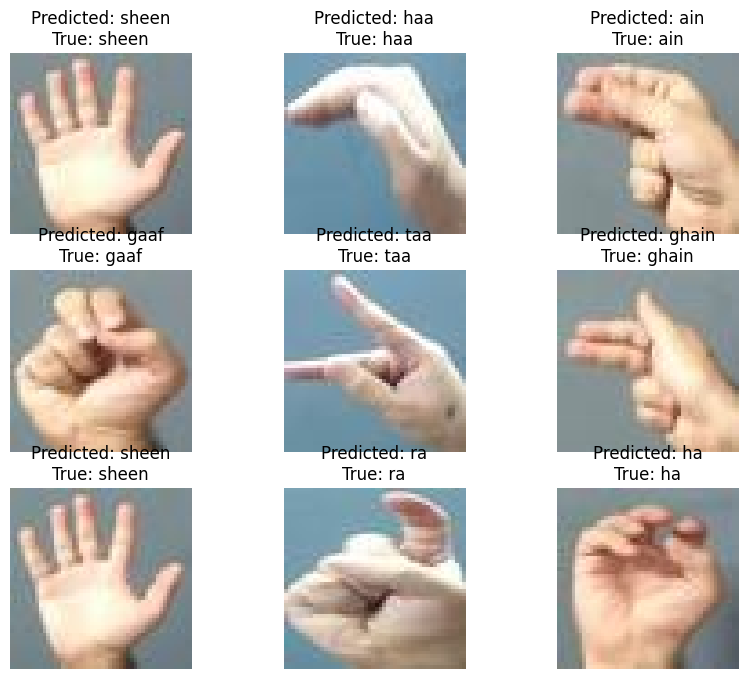

In [26]:
# Retrieve a batch of images from the test set
image_batch, label_batch = testing_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class for each image
true_classes = np.argmax(label_batch, axis=1)

# Display the images with their predicted classes
plt.figure(figsize=(10, 8))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f'Predicted: {classes[predicted_classes[i]]}\nTrue: {classes[true_classes[i]]}')
  plt.axis("off")



* 1.The model is outperforming our problem and so we will design architecture from scratch that's suitable to our problem
* 2. When  quick and fast output needed with very limited computational power , we can use this model .


<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 10. Model2  <strong style="color:black;font-size:35px;font-family:Georgia;"> CNN</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="10"></a>

In [27]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the input layer with a different variable name
input_layer = Input(shape=(50, 50, 3))
x1 = data_augmentation(input_layer)
# Branch 1
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Conv2D(512, (3, 3), activation='relu', padding='same')(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)
x1 = Flatten()(x1)

# Fully connected layers
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
output = Dense(28, activation='softmax')(x1)

# Create the model
model2 = Model(inputs=input_layer, outputs=output)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Print the model summary
model2.summary()


Model: "model_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         

                                                                 

 conv2d (Conv2D)             (None, 50, 50, 64)        1792      

                                                                 

 batch_normalization (Batch  (None, 50, 50, 64)        256       

 Normalization)                                                  

                                                                 

 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         

 D)                                                              

                                                                 

 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     

                                                                 

 dropout (Dropout)           (None, 25, 25,

In [28]:
log_dir = os.path.join('Logs/new_cnn')
tb_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,
                          update_freq='epoch',
                          profile_batch=0) ## !tensorboard --logdir=.
mc = ModelCheckpoint('Models/new_cnn.h5', monitor='val_acc', mode='max', verbose=1,save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1,patience=5)
callbacks = [tb_callback,mc,es]

In [29]:
history=model2.fit(training_dataset,epochs=50,callbacks=[callbacks], validation_data = validation_dataset)


Epoch 1/50

151/151 [==============================] - ETA: 0s - loss: 0.8574 - acc: 0.7810

Epoch 1: val_acc improved from -inf to 0.08173, saving model to Models/new_cnn.h5

151/151 [==============================] - 158s 1s/step - loss: 0.8574 - acc: 0.7810 - val_loss: 4.7711 - val_acc: 0.0817

Epoch 2/50

151/151 [==============================] - ETA: 0s - loss: 0.2145 - acc: 0.9460

Epoch 2: val_acc improved from 0.08173 to 0.56490, saving model to Models/new_cnn.h5

151/151 [==============================] - 160s 1s/step - loss: 0.2145 - acc: 0.9460 - val_loss: 1.6052 - val_acc: 0.5649

Epoch 3/50

151/151 [==============================] - ETA: 0s - loss: 0.0837 - acc: 0.9760

Epoch 3: val_acc improved from 0.56490 to 0.68990, saving model to Models/new_cnn.h5

151/151 [==============================] - 156s 1s/step - loss: 0.0837 - acc: 0.9760 - val_loss: 1.9421 - val_acc: 0.6899

Epoch 4/50

151/151 [==============================] - ETA: 0s - loss: 0.0609 - acc: 0.9840

Epoc

In [31]:
history=model2.fit(training_dataset,epochs=50,callbacks=[callbacks], validation_data = validation_dataset)


Epoch 1/50

151/151 [==============================] - ETA: 0s - loss: 0.0534 - acc: 0.9883

Epoch 1: val_acc did not improve from 0.87260

151/151 [==============================] - 154s 1s/step - loss: 0.0534 - acc: 0.9883 - val_loss: 1.5786 - val_acc: 0.7212

Epoch 2/50

151/151 [==============================] - ETA: 0s - loss: 0.0460 - acc: 0.9873

Epoch 2: val_acc improved from 0.87260 to 0.93510, saving model to Models/new_cnn.h5

151/151 [==============================] - 157s 1s/step - loss: 0.0460 - acc: 0.9873 - val_loss: 0.6013 - val_acc: 0.9351

Epoch 3/50

151/151 [==============================] - ETA: 0s - loss: 0.0918 - acc: 0.9844

Epoch 3: val_acc did not improve from 0.93510

151/151 [==============================] - 150s 987ms/step - loss: 0.0918 - acc: 0.9844 - val_loss: 3.5199 - val_acc: 0.6995

Epoch 4/50

151/151 [==============================] - ETA: 0s - loss: 0.0597 - acc: 0.9927

Epoch 4: val_acc did not improve from 0.93510

151/151 [====================

In [32]:
history=model2.fit(training_dataset,epochs=50,callbacks=[callbacks], validation_data = validation_dataset)


Epoch 1/50

151/151 [==============================] - ETA: 0s - loss: 0.0209 - acc: 0.9950

Epoch 1: val_acc did not improve from 0.93510

151/151 [==============================] - 160s 1s/step - loss: 0.0209 - acc: 0.9950 - val_loss: 3.6633 - val_acc: 0.7428

Epoch 2/50

151/151 [==============================] - ETA: 0s - loss: 0.0094 - acc: 0.9983

Epoch 2: val_acc did not improve from 0.93510

151/151 [==============================] - 164s 1s/step - loss: 0.0094 - acc: 0.9983 - val_loss: 3.6007 - val_acc: 0.7668

Epoch 3/50

151/151 [==============================] - ETA: 0s - loss: 0.0124 - acc: 0.9979

Epoch 3: val_acc did not improve from 0.93510

151/151 [==============================] - 155s 1s/step - loss: 0.0124 - acc: 0.9979 - val_loss: 1.6276 - val_acc: 0.8462

Epoch 4/50

151/151 [==============================] - ETA: 0s - loss: 0.0310 - acc: 0.9962

Epoch 4: val_acc did not improve from 0.93510

151/151 [==============================] - 153s 1s/step - loss: 0.0310 

In [33]:
history=model2.fit(training_dataset,epochs=50,callbacks=[callbacks], validation_data = validation_dataset)


Epoch 1/50

151/151 [==============================] - ETA: 0s - loss: 0.1165 - acc: 0.9877

Epoch 1: val_acc did not improve from 0.93510

151/151 [==============================] - 163s 1s/step - loss: 0.1165 - acc: 0.9877 - val_loss: 2.8024 - val_acc: 0.8077

Epoch 2/50

151/151 [==============================] - ETA: 0s - loss: 0.0544 - acc: 0.9942

Epoch 2: val_acc did not improve from 0.93510

151/151 [==============================] - 158s 1s/step - loss: 0.0544 - acc: 0.9942 - val_loss: 6.4202 - val_acc: 0.7091

Epoch 3/50

151/151 [==============================] - ETA: 0s - loss: 0.0153 - acc: 0.9971

Epoch 3: val_acc did not improve from 0.93510

151/151 [==============================] - 153s 1s/step - loss: 0.0153 - acc: 0.9971 - val_loss: 0.7979 - val_acc: 0.9135

Epoch 4/50

151/151 [==============================] - ETA: 0s - loss: 0.0066 - acc: 0.9983

Epoch 4: val_acc did not improve from 0.93510

151/151 [==============================] - 152s 999ms/step - loss: 0.00

<h2 style="color:#dc0405;font-size:40px;font-family:Georgia;text-align:center;">
    <strong>🎯 11. Results   <strong style="color:black;font-size:35px;font-family:Georgia;"> and Conclusion</strong></strong>
</h2>

<!-- Create an anchor link with a numerical ID and set the color -->
<a id="11"></a>

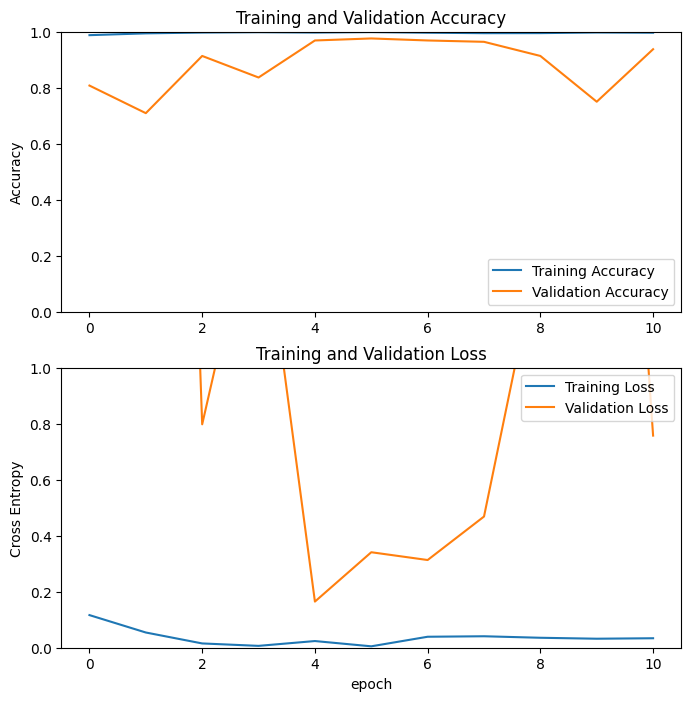

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
model2.save('Models/last_training_model.h5')  # Save the Keras model as usual
# Now save the Keras model as .sav using joblib
joblib.dump(model2, 'Models/last_training_model.sav')

['Models/last_training_model.sav']

In [36]:
model2.evaluate(testing_dataset)

12/12 [==============================] - 4s 253ms/step - loss: 0.6627 - acc: 0.9505


[0.6627413630485535, 0.9505208134651184]

* Building Architecture from scratch is not an easy task and trying till you reach optimal parameter for your problem is very time consuming , so we tried our best to come up with this architecture , which was not the most stable one but after many epcohs of training it reached very good accuracy of 95% and we tested it on some images and got all of them write. <br>